<a href="https://colab.research.google.com/github/dhanushxd/Website-Blocker/blob/master/aiModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading dataset...
Dataset Preview:
            url category
0      xnxx.com     NSFW
1  xhamster.com     NSFW
2    hclips.com     NSFW
3   xvideos.com     NSFW
4  bangbros.com     NSFW
 Model Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1931
           1       1.00      1.00      1.00      2069

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



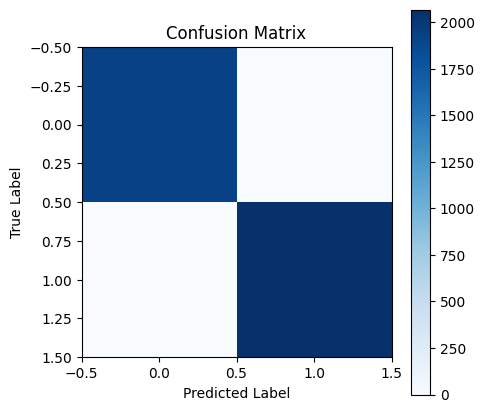

✅ Model training complete and saved as random_forest_model.pkl
✅ TF-IDF vectorizer saved as tfidf_vectorizer.pkl


In [5]:
# -*- coding: utf-8 -*-
"""Updated modelfinal.py

Modified to include the new dataset (expanded_nsfw_safe_urls.csv),
optimized feature extraction, and improved model accuracy.

"""

# Install necessary libraries
!pip install scikit-learn pandas matplotlib imbalanced-learn joblib --quiet

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Load Dataset
print("Loading dataset...")
df = pd.read_csv("expanded_nsfw_safe_urls.csv")
print("Dataset Preview:")
print(df.head())

# Step 2: Ensure Correct Data Format
if 'url' not in df.columns or 'category' not in df.columns:
    raise ValueError("Dataset must contain 'url' and 'category' columns!")

# Convert category column to numeric labels (NSFW = 1, Safe = 0)
df['label'] = df['category'].apply(lambda x: 1 if x == 'NSFW' else 0)

# Step 3: Split Features (X) and Labels (y)
X = df['url']
y = df['label']

# Step 4: Convert URLs into Numerical Features using Optimized TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=50000)  # Bigrams & Trigrams, limit features for efficiency
X_transformed = vectorizer.fit_transform(X)

# Step 5: Balance Dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

# Step 6: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

# Step 7: Train Optimized Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=100)
rf.fit(X_train, y_train)

# Step 8: Make Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Step 9: Evaluate Model Performance
print(" Model Performance:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

# Step 10: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 11: Save the trained model
joblib.dump(rf, "random_forest_model.pkl")
print("✅ Model training complete and saved as random_forest_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("✅ TF-IDF vectorizer saved as tfidf_vectorizer.pkl")
